In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Total requests per load balancing strategy.
# The values were determined from the CSV output data,
# by adding the number of completed requests to the number of pending VUs
# that had not finished their requests by the end of the test.
total_requests = {
    "Single Host": 60,
    "Round Robin": 60,
    "Least Connection": 60,
    "ollamaFlow": 61,
}

In [3]:
# Read the CSV file into a DataFrame
files = {
    "Single Host": "result-single-host/test.csv",
    "Round Robin": "result-roundrobin/test.csv",
    "Least Connection": "result-leastconn/test.csv",
    "ollamaFlow": "result-ollamaflow/test.csv",
}
dfs = []
for source, file_path in files.items():
    df_temp = pd.read_csv(file_path)
    df_temp['source'] = source
    dfs.append(df_temp)

df = pd.concat(dfs, ignore_index=True)

In [4]:
# Convert the 'timestamp' column from Unix epoch to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

In [5]:
# Calculate elapsed time in minutes since the first timestamp
df['elapsed_seconds'] = (
    df.groupby('source')['timestamp']
      .transform(lambda x: (x - x.min()).dt.total_seconds())
)
df['elapsed_minutes'] = df['elapsed_seconds'] / 60.0

In [6]:
df = df[df['metric_name'] == 'http_reqs']

df['completed_request'] = (
    df.groupby('source')['metric_value']
      .cumsum()
)

df['throughput_cumulative'] = df['completed_request'] / df['elapsed_seconds']
df = df.replace([float('inf')], 0) 

C:\Users\rodin\AppData\Local\Temp\ipykernel_43384\3765222766.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace([float('inf')], 0)


,metric_name,timestamp,metric_value,check,error,error_code,expected_response,group,method,name,...,subproto,tls_version,url,extra_tags,metadata,source,elapsed_seconds,elapsed_minutes,completed_request,throughput_cumulative
84,http_reqs,2025-11-09 05:49:28,1.0,NaN,NaN,NaN,True,NaN,POST,http://localhost:11434/api/generate,...,NaN,NaN,http://localhost:11434/api/generate,NaN,NaN,Single Host,41.0,0.683333,1.0,0.024390
185,http_reqs,2025-11-09 05:50:12,1.0,NaN,NaN,NaN,True,NaN,POST,http://localhost:11434/api/generate,...,NaN,NaN,http://localhost:11434/api/generate,NaN,NaN,Single Host,85.0,1.416667,2.0,0.023529
298,http_reqs,2025-11-09 05:51:00,1.0,NaN,NaN,NaN,True,NaN,POST,http://localhost:11434/api/generate,...,NaN,NaN,http://localhost:11434/api/generate,NaN,NaN,Single Host,133.0,2.216667,3.0,0.022556
415,http_reqs,2025-11-09 05:51:52,1.0,NaN,NaN,NaN,True,NaN,POST,http://localhost:11434/api/generate,...,NaN,NaN,http://localhost:11434/api/generate,NaN,NaN,Single Host,185.0,3.083333,4.0,0.021622
540,http_reqs,2025-11-09 05:52:47,1.0,NaN,NaN,NaN,True,NaN,POST,http://localhost:11434/api/generate,...,NaN,NaN,http://localhost:11434/api/generate,NaN,NaN,Single Host,240.0,4.000000,5.0,0.020833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33212,http_reqs,2025-11-10 02:01:48,1.0,NaN,NaN,NaN,True,NaN,POST,http://localhost:3000/ollama/generate,...,NaN,NaN,http://localhost:3000/ollama/generate,NaN,NaN,ollamaFlow,2852.0,47.533333,57.0,0.019986
33347,http_reqs,2025-11-10 02:02:47,1.0,NaN,NaN,NaN,True,NaN,POST,http://localhost:3000/ollama/generate,...,NaN,NaN,http://localhost:3000/ollama/generate,NaN,NaN,ollamaFlow,2911.0,48.516667,58.0,0.019924
33494,http_reqs,2025-11-10 02:03:53,1.0,NaN,NaN,NaN,True,NaN,POST,http://localhost:3000/ollama/generate,...,NaN,NaN,http://localhost:3000/ollama/generate,NaN,NaN,ollamaFlow,2977.0,49.616667,59.0,0.019819
33617,http_reqs,2025-11-10 02:04:48,1.0,NaN,NaN,NaN,True,NaN,POST,http://localhost:3000/ollama/generate,...,NaN,NaN,http://localhost:3000/ollama/generate,NaN,NaN,ollamaFlow,3032.0,50.533333,60.0,0.019789


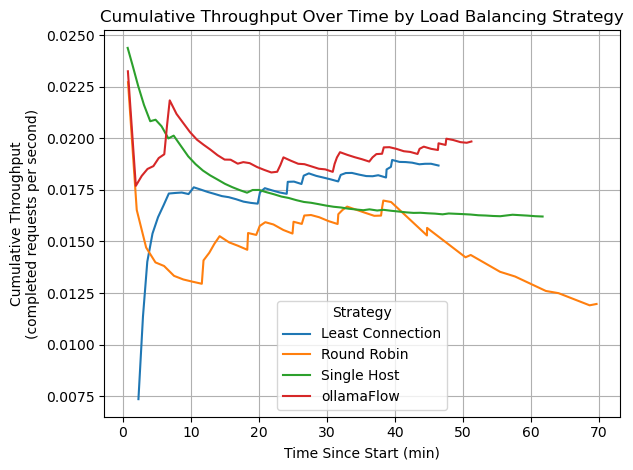

In [7]:
plt.figure()
for source, subset in df.groupby('source'):
    plt.plot(subset['elapsed_minutes'], subset['throughput_cumulative'], label=source)

plt.xlabel('Time Since Start (min)')
plt.ylabel('Cumulative Throughput\n(completed requests per second)')
plt.title('Cumulative Throughput Over Time by Load Balancing Strategy')
plt.legend(title='Strategy')
plt.grid(True)
plt.tight_layout()
plt.show()